In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "none",
        "transition": "none",
        "start_slideshow_at": "selected",
        "scroll": False
     }
)


<h1 align='center'>Data and Model Version Control: Applications in ML Drug Discovery pipelines
</h1>


<h3 align='center'>Estefania Barreto-Ojeda</h3>
<h4 align='center'>Computational Scientist <br> Cyclica Inc.</h4>

<h3 align='left'>Overview</h3>

**Part I: Biological data**
- What makes biological data different? 
- Overview ML drug discovery pipelines
- Data feedback loops: optimizing ML models.
- Challenges.

**Part II: Implementing data-versioned control in drug discovery ML pipelines**
- Introduction to DVC.
- Implementing DVC for biological data.
- Tracking data and models in drug discovery.
- Rolling back and forward through versions.
- Highlights.


<h1 align='center'>Part I: Biological Data</h1>

<br>
<h2 align='center'>Data is crucial for Machine Learning.</h2>

<br><br>
<center>
We need a lot of data.
</center>

<br>
<center>
We <b>have</b> a lot of data.
</center>
<br>
<br>

<center><h3 style="color:darkred;">Data != Information</h3><center>

 <h1 align='center'>Biological data is complex</h1>
 


<img src="img/ComplexData.png"  class='center'>

<br>
<br>
<br>


<center><h3 style="color:darkred;">Data != Information</h3><center>

<!-- Heterogenous -->


<p align="left"><img src="img/heterogeneous.png"/></p>


* Diverse formats.
* Derived from specific assays.
    
<br>
<img src="img/omics.png" align='right' width=800>
<br>

<!-- <p align="right"><img src="img/omics.png"/></p> -->

<!-- High dimensional -->

<p align="left"><img src="img/high-dim.png"/></p>
<br>

- Low number of samples (observations).
- High number of variables (features).

<br>
<img src="img/highdim_nature.png" align='right' width=700>
<br>

- Example:
    - 10,000 samples mRNA.
    - Each sample with 100 tumors.
    - 100 tumours existing in 10,000-D space. 

<center>
<h6 style="color:lightgrey;">R. Clarke et al. Nat. Rev. Cancer (2008)</h6>
</center>



<!-- Conditional -->
<p align="left"><img src="img/conditional.png"/></p>
<br>

<br>
<img src="img/practical-rec.jpg" align='right' width=600>


- Protocols are not always reproducible.
- Elusive ground truths.


- Example:
    - No standards or tools available:
        - aggregating data.
        - curating data.
    - Standardized methods available lack functionality.
    - Complex problems, complex experiments.

<center>
<h6 style="color:lightgrey;">V.L. Porubsky, et al. Cancer Cell (2020)</h6>
</center>

The literature on reproducibility agrees to a large degree that the same experiment is conducted as long as the same experimental method is followed. However, following the same method is not enough. 

Popular deep learning (and other machine learning) methods are often used to tackle classification tasks and thus require ground-truth labels for training. 

<!-- Research biased -->

<br>
<p align="left"><img src="img/biased.png"/></p>
<br>

<img src="img/covid_nature.png" align='right' width=500>

- Bias towards specific outputs.
- More data on “hot” topics.



- Example:
        
    Articles on COVID-19:

    - **2020:** +192 k
    - **2021:** +298 k
    
<center>
<h6 style="color:lightgrey;">(H. Else, Nature 2020)</h6>
</center>

<br>
<h2 align='center'>Biological data is complex</h2></text>
<br>
<br>
<div class="col-md-8" markdown="1">
<br>
<br>
</div>

<div class="col-md-8" markdown="1">

- **Dissimilar**

    →  Diverse formats and content.

<br>

- **Imbalanced**

    →  More data for given feature.
</div>


- **Redundant**

    →  Duplicated values.
    
<br>

- **Sparse**

    →  Lack annotations.
    
<br>
<br>
<center><h3 style="color:darkred;">Data != Information</h3><center>

<br>
<h2 align='center'>Biological data is complex</h2></text>
<br>


- No direct use or implementation.

- Requires curation!


<br>
<img src="img/BearTheData.png" align='center' width=490>
<br>

<center>
    <h3 style="color:darkcyan;">Data == Information
    </h3>
<center>

<br>
<h2 align='left'>ML Workflow</h2></text>
<br>
<img src="img/step1.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow</h2></text>

<img src="img/step2.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow Drug Discovery Pipelines
</h2></text>
<br>
<img src="img/step2-DD.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow Drug Discovery Pipelines
</h2></text>
<br>
<img src="img/step3.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow Drug Discovery Pipelines
</h2>
<br>
<img src="img/step4.png" align='center'>
<br>


<br>
<h2 align='left'>ML Workflow Drug Discovery Pipelines
</h2>

<br>

* Keep model updated.
* Integration of new generated data.

<br><br>

<center>
<b>Flexible ML models</b>
</center>

<br>
<img src="img/experiments.png" align='center'>

<br>
<h2 align='left'>Drug Discovery Pipelines: challenges
</h2>


* Not completely defined by the code or the dataset only. 
* Changes in the dataset + data processing + code.
* ML is the set of:
    * All the possible models.
    * Every version of initial dataset and transformed dataset.
    * Associated metrics.


<img src="img/experiments-hl.png" align='center'>

<br>
<h2 align='left'>Drug Discovery Pipelines: challenges
</h2>
<br>

(1) Raw data, curated data.

(2) ML models.

(3) Metrics.

To improve prediction: More ML models and more metrics.
<h3 align='center'>How do we track all these changes?
</h3>
<br>
<img src="img/experiments-hl.png" align='center'>

<br>
<h2 align='left'>Drug Discovery Pipelines: challenges
</h2>
<br>

(1) Raw data, curated data.

(2) ML models.

(3) Metrics.

To improve prediction: More ML models and more metrics.
<h3 align='center'>How do we track all these changes?
</h3>
<br>
<img src="img/experiments-DVC.png" align='center'>

<h1 align='center'>Part II: Implementing data version control in drug discovery ML pipelines
</h1>

<h2 align='left'>What is DVC?</h2>

<u>D</u>ata <u>V</u>ersion <u>C</u>ontrol
<div class="col-md-8" markdown="1">

<img src="img/DVClogo.svg" align='left' width=150>
</div>
<br>
<div class="col-md-8" markdown="1">

* Open source.
* Compatible with git providers.
* Compatible with cloud storage providers.
* Language and framework agnostic.

**What can it do?**
* Track data and metrics.
* Version control ML projects.
* Manage ML experiments.
<br>
</div>

<br>

**What is not?**

Disney Vacation Club

<img src="img/not-dvc.jpeg" align='left' width=200>



**Installing DVC**

<br>

```bash

pip install dvc


```

- Choose your cloud provider:
    `[s3]`, `[gdrive]`, `[gs]`, `[azure]`, etc. 

- Use `[all]` to include them all.

<br>

For this talk, cloud provider is Google Cloud: `dvc[gs]`


```bash

pip install "dvc[gs]"


```

In [ ]:
! pip install "dvc[gs]"

**Initialize DVC**

DVC works best with Git repos.

```bash

dvc init


```

In [ ]:
! mkdir /tmp/tmp_demo2
! cd /tmp/tmp_demo2 && git init  &&  dvc init

At DVC initialization, a new `.dvc/` directory is created for configuration:

In [ ]:
! ls -a ../ | grep "^\."

**Set remote**

```bash

dvc remote add <remote_name> <url>


```

In [ ]:
! dvc remote add test gs://cyc-dvc-storage/test
! cat ../.dvc/config

In [ ]:
! dvc remote list

In [ ]:
! dvc remote default

In [ ]:
! dvc remote default test
! dvc remote default

In [ ]:
! cat ../.dvc/config   # To get/set DVC configuration options.

To start tracking a file or directory, use `dvc add`:

```bash

dvc add data/file_with_data.csv


```

In [ ]:
! echo "This  is a test file." >../data/simple_echo.csv
! ls ../data
! dvc add ../data/simple_echo.csv

1. `dvc add`

1.1. `dvc add` --> `*.dvc` (Metadata)

In [ ]:
! ls ../data/

In [ ]:
! cat ../data/simple_echo.csv.dvc

1.2. `dvc add` --> `.dvc/cache` (Cache MD5 hash).

What just happened?

```

.dvc/cache

|
└── XY

    |
    └── abcdefghijk1234567890....f


```

In [ ]:
cat ../.dvc/cache/de/c9dae10b89d3cd7b3f76497cafb53c

1.3. `dvc add` --> `.gitignore` (ignore data files).

For files/directories to be excluded.

In [ ]:
! cat ../data/.gitignore

1. `dvc add`:

- generate dvc file
- store cache
- ignore data files


2. Track `.dvc` files with git!

```bash

git add data/simple_echo.csv.dvc data/.gitignore

git commit -m "Add sample data. Initial version."


```

<h2 align='left'>Implementing DVC in Drug Discovery Pipelines
</h2>
<br>

1. Set up:
    
    - Install
    - Initialize
    - Set remote storage
    - Test adding files


2. Data versioning and model versioning.
3. Rolling backward/forward.
4. Highlights

<h2 align='left'>Data versioning and model versioning.</h2>
<br>

**Drug Discovery Pipelines: challenges**

(1) Raw data, curated data.

(2) ML models.

(3) Metrics.


<br>
<img src="img/experiments-DVC.png" align='center' width=1100>


<h2 align='left'>Data versioning and model versioning.</h2>
<br>
(1) Curated data --> `/data/clean_data.csv`


In [3]:
import pandas as pd
data = pd.read_csv('./data/clean_data.csv')
data.head()

smiles  class
0  C=1([C@@H](C(=C(C)NC1C)C(OC)=O)c1cc(ccc1)[N+](...      1
1               C1(\c2c(CCc3c1cccc3)cccc2)=C\CCN(C)C      1
2  c1(c2c(cccc2)oc1CCCC)C(c1cc(c(OCCN(CC)CC)c(c1)...      1
3  [H][C@H]1CC[C@@H](C#N)C1C(=O)C3CN(C(C)c2ccc(C#...      1
4                  [nH]1ccnc1-c2ccc(cc2)OCCCN3CCCCC3      1

In [2]:
data['smiles'][1]

'C1(\\c2c(CCc3c1cccc3)cccc2)=C\\CCN(C)C'

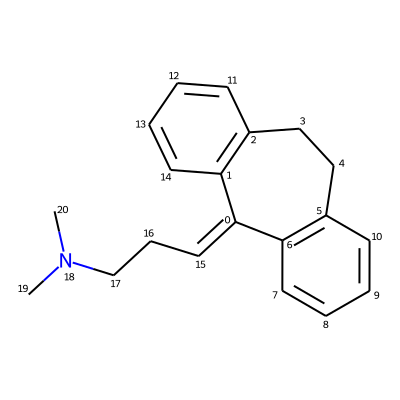

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400,400

mol_ten = Chem.MolFromSmiles(data['smiles'][1])
mol_ten

<h2 align='left'>Data versioning and model versioning.</h2>
<br>


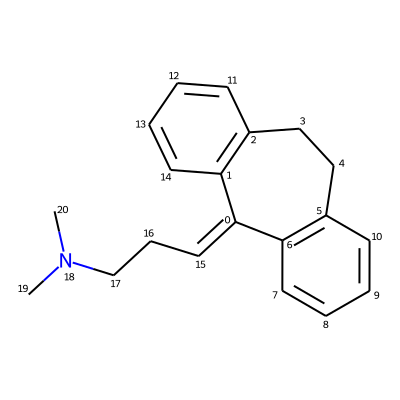

In [4]:
mol_ten

In [5]:
import pubchempy as pcp

id_ = pcp.get_compounds(data['smiles'][1], 'smiles')[0]
id_.synonyms[0]

'amitriptyline'

<h2 align='left'>Data versioning and model versioning.</h2>
<br>


In [6]:
labels = data['class']
labels.shape

(4000,)

In [7]:
smiles = data['smiles']
smiles.shape

(4000,)

a) Featurize data

```python

from src.utils import get_descriptors

df_process = get_descriptors(smiles)

df_process.to_csv("./data/processed_data.csv")


```

In [4]:
featurized_data =  pd.read_csv('./data/processed_data.csv')
featurized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 400 entries, Unnamed: 0 to qed
dtypes: float64(399), int64(1)
memory usage: 12.2 MB


<h2 align='left'>Data versioning and model versioning.</h2>
<br>


In [20]:
featurized_data.shape

(4000, 400)

In [9]:
from src.utils import remove_zeros, filter_correlation
descriptors_df = remove_zeros(featurized_data, threshold=0)

Removing 347 features.


In [10]:
filtered_data = desc_df = filter_correlation(descriptors_df, filter=0.95)

Removing column AUTOCORR2D_17
Removing column AUTOCORR2D_18
Removing column AUTOCORR2D_2
Removing column AUTOCORR2D_25
Removing column AUTOCORR2D_26
Removing column AUTOCORR2D_33
Removing column AUTOCORR2D_34
Removing column AUTOCORR2D_9
Removing column Chi0n
Removing column Chi0v
Removing column Chi1
Removing column Chi1v
Removing column Chi2n
Removing column ExactMolWt
Removing column HeavyAtomCount
Removing column HeavyAtomMolWt
Removing column Kappa1
Removing column LabuteASA
Removing column MaxEStateIndex
Removing column MinAbsPartialCharge
Removing column MinPartialCharge
Removing column MolMR
Removing column MolWt
Removing column NumValenceElectrons


In [12]:
filtered_data.shape

(4000, 29)

<h1 align='center'>Acknowledgments<br></h1>

**Cyclica:**
- Stephen MacKinnon
- Ali Madani
- Steve Constable
- Maria Elena Garcia
- Federico Comitani
- Daniella Lato

<h2 align='center'>Thanks!<br></h2>

<h2 align='center'>Questions?<br></h2>